In [1]:
#Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.6.2
1.19.5


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

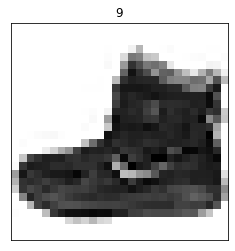

In [7]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(train_labels[0])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

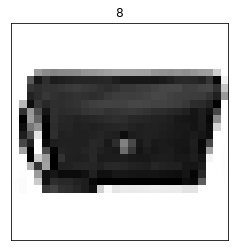

In [8]:
plt.imshow(train_images[110],cmap='gray_r')
plt.title(train_labels[110])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [9]:
class_names = ['T-shirts/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [10]:
class_names

['T-shirts/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
class_names[3]

'Dress'

In [12]:
train_labels[0]

9

In [13]:
class_names[train_labels[0]]

'Ankle boot'

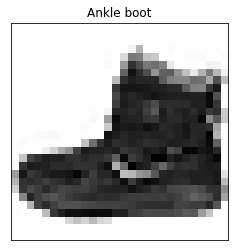

In [14]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(class_names[train_labels[0]])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

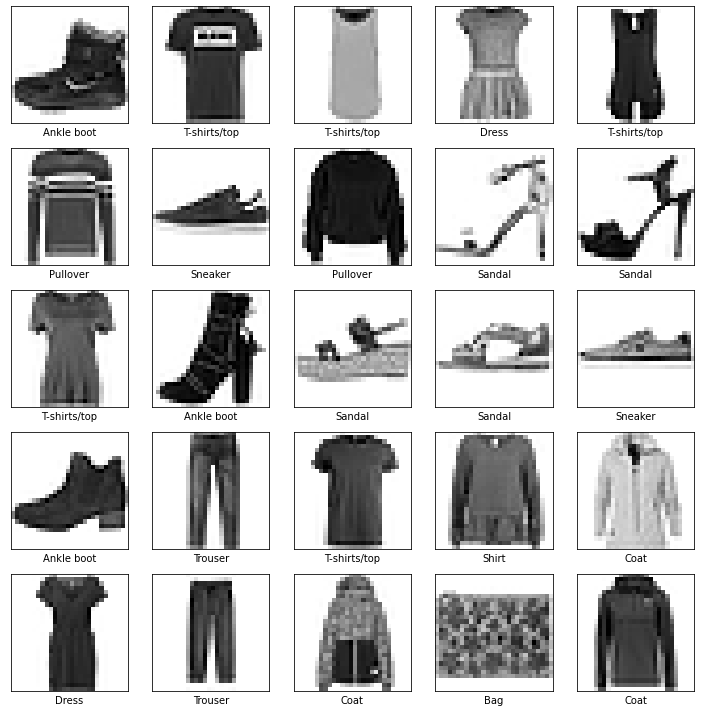

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

In [16]:
train_images = train_images/255.0
test_images = test_images/255.0

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(10,'softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [20]:
history = model.fit(train_images,train_labels,validation_split=0.2,epochs=50,verbose=2)

Epoch 1/50


C:\Users\HP\anaconda3\envs\deepl\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1500/1500 - 11s - loss: 0.4923 - accuracy: 0.8254 - val_loss: 0.3949 - val_accuracy: 0.8583
Epoch 2/50
1500/1500 - 11s - loss: 0.3706 - accuracy: 0.8641 - val_loss: 0.3600 - val_accuracy: 0.8701
Epoch 3/50
1500/1500 - 11s - loss: 0.3301 - accuracy: 0.8781 - val_loss: 0.3536 - val_accuracy: 0.8753
Epoch 4/50
1500/1500 - 10s - loss: 0.3069 - accuracy: 0.8871 - val_loss: 0.3242 - val_accuracy: 0.8859
Epoch 5/50
1500/1500 - 10s - loss: 0.2874 - accuracy: 0.8928 - val_loss: 0.3295 - val_accuracy: 0.8811
Epoch 6/50
1500/1500 - 11s - loss: 0.2702 - accuracy: 0.8993 - val_loss: 0.3441 - val_accuracy: 0.8766
Epoch 7/50
1500/1500 - 10s - loss: 0.2581 - accuracy: 0.9039 - val_loss: 0.3214 - val_accuracy: 0.8850
Epoch 8/50
1500/1500 - 10s - loss: 0.2445 - accuracy: 0.9087 - val_loss: 0.3330 - val_accuracy: 0.8848
Epoch 9/50
1500/1500 - 10s - loss: 0.2333 - accuracy: 0.9128 - val_loss: 0.3150 - val_accuracy: 0.8893
Epoch 10/50
1500/1500 - 10s - loss: 0.2261 - accuracy: 0.9160 - val_loss: 0.3384 - v

In [21]:
history.history

{'loss': [0.4922642111778259,
  0.37058281898498535,
  0.33005064725875854,
  0.3069080710411072,
  0.2873768210411072,
  0.27021488547325134,
  0.25805193185806274,
  0.24453391134738922,
  0.23327791690826416,
  0.2261093705892563,
  0.2179899513721466,
  0.20756401121616364,
  0.20130322873592377,
  0.1914329081773758,
  0.1864120215177536,
  0.18326900899410248,
  0.1709912270307541,
  0.169560045003891,
  0.16239778697490692,
  0.1561766415834427,
  0.15327514708042145,
  0.14885610342025757,
  0.14115551114082336,
  0.13940130174160004,
  0.13397474586963654,
  0.13028453290462494,
  0.13081219792366028,
  0.12454267591238022,
  0.12050667405128479,
  0.11670945584774017,
  0.1145484447479248,
  0.11350587010383606,
  0.10960159450769424,
  0.10496972501277924,
  0.10339399427175522,
  0.10139615833759308,
  0.0988139659166336,
  0.09556214511394501,
  0.09500403702259064,
  0.09411482512950897,
  0.08825203776359558,
  0.08734481036663055,
  0.09217396378517151,
  0.083959028124

In [22]:
history.history['loss']

[0.4922642111778259,
 0.37058281898498535,
 0.33005064725875854,
 0.3069080710411072,
 0.2873768210411072,
 0.27021488547325134,
 0.25805193185806274,
 0.24453391134738922,
 0.23327791690826416,
 0.2261093705892563,
 0.2179899513721466,
 0.20756401121616364,
 0.20130322873592377,
 0.1914329081773758,
 0.1864120215177536,
 0.18326900899410248,
 0.1709912270307541,
 0.169560045003891,
 0.16239778697490692,
 0.1561766415834427,
 0.15327514708042145,
 0.14885610342025757,
 0.14115551114082336,
 0.13940130174160004,
 0.13397474586963654,
 0.13028453290462494,
 0.13081219792366028,
 0.12454267591238022,
 0.12050667405128479,
 0.11670945584774017,
 0.1145484447479248,
 0.11350587010383606,
 0.10960159450769424,
 0.10496972501277924,
 0.10339399427175522,
 0.10139615833759308,
 0.0988139659166336,
 0.09556214511394501,
 0.09500403702259064,
 0.09411482512950897,
 0.08825203776359558,
 0.08734481036663055,
 0.09217396378517151,
 0.08395902812480927,
 0.0784359723329544,
 0.08041825890541077,
 0

In [23]:
history.history['accuracy']

[0.8253750205039978,
 0.8641250133514404,
 0.8780624866485596,
 0.8871458172798157,
 0.8928333520889282,
 0.8992708325386047,
 0.9038541913032532,
 0.9086666703224182,
 0.9128333330154419,
 0.9160208106040955,
 0.918583333492279,
 0.9227916598320007,
 0.9246249794960022,
 0.9274583458900452,
 0.929604172706604,
 0.9305208325386047,
 0.9358958601951599,
 0.937125027179718,
 0.9387708306312561,
 0.9418958425521851,
 0.9419999718666077,
 0.9441041946411133,
 0.9474791884422302,
 0.9474166631698608,
 0.950041651725769,
 0.9502291679382324,
 0.9508958458900452,
 0.9535624980926514,
 0.9551041722297668,
 0.9568125009536743,
 0.9565208554267883,
 0.956416666507721,
 0.9588958621025085,
 0.961062490940094,
 0.9607499837875366,
 0.9622708559036255,
 0.9625416398048401,
 0.964187502861023,
 0.9642916917800903,
 0.9645000100135803,
 0.9672708511352539,
 0.9670208096504211,
 0.9654791951179504,
 0.9689375162124634,
 0.9704583287239075,
 0.9702916741371155,
 0.9707499742507935,
 0.9702083468437195,

In [24]:
history.history['val_loss']

[0.39492976665496826,
 0.3599502742290497,
 0.3535991609096527,
 0.3241931200027466,
 0.3295299708843231,
 0.34408703446388245,
 0.32144081592559814,
 0.3329984247684479,
 0.3150414526462555,
 0.3384428024291992,
 0.3321343660354614,
 0.34879961609840393,
 0.3586638569831848,
 0.3371901512145996,
 0.33084967732429504,
 0.3377579152584076,
 0.3584652543067932,
 0.3607523739337921,
 0.3522656559944153,
 0.3706243932247162,
 0.379199743270874,
 0.39439648389816284,
 0.37195348739624023,
 0.39565831422805786,
 0.3836241066455841,
 0.39435485005378723,
 0.4052765369415283,
 0.4051201641559601,
 0.39497295022010803,
 0.4303790330886841,
 0.42331352829933167,
 0.4501808285713196,
 0.43053528666496277,
 0.4290309250354767,
 0.47488778829574585,
 0.45772722363471985,
 0.4589514434337616,
 0.4986107647418976,
 0.46743541955947876,
 0.4596364200115204,
 0.4790448844432831,
 0.5027612447738647,
 0.500497579574585,
 0.5210875868797302,
 0.5179146528244019,
 0.5415860414505005,
 0.5346788167953491,


In [25]:
history.history['val_accuracy']

[0.8583333492279053,
 0.8700833320617676,
 0.875333309173584,
 0.8859166502952576,
 0.8810833096504211,
 0.8765833377838135,
 0.8849999904632568,
 0.8848333358764648,
 0.8893333077430725,
 0.8862500190734863,
 0.8898333311080933,
 0.8870833516120911,
 0.8794999718666077,
 0.8885833621025085,
 0.8952500224113464,
 0.8913333415985107,
 0.890250027179718,
 0.8859999775886536,
 0.8899166584014893,
 0.893916666507721,
 0.8900833129882812,
 0.887416660785675,
 0.887583315372467,
 0.890583336353302,
 0.8927500247955322,
 0.8941666483879089,
 0.8879166841506958,
 0.8952500224113464,
 0.8931666612625122,
 0.893916666507721,
 0.8901666402816772,
 0.8882499933242798,
 0.8968333601951599,
 0.8913333415985107,
 0.8885833621025085,
 0.8900833129882812,
 0.890500009059906,
 0.8867499828338623,
 0.890333354473114,
 0.8942499756813049,
 0.8952500224113464,
 0.8928333520889282,
 0.8970000147819519,
 0.893666684627533,
 0.8927500247955322,
 0.8901666402816772,
 0.8931666612625122,
 0.8963333368301392,
 0

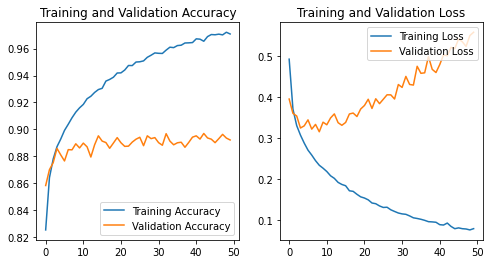

In [26]:
epochs=50
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
model_new = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(10,'softmax')
])

In [28]:
model_new.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [30]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [32]:
history = model_new.fit(train_images, train_labels, epochs=50, validation_split=0.2,callbacks=callback,verbose=1)

Epoch 1/50
1500/1500 [==============================] - 13s 8ms/step - loss: 0.4925 - accuracy: 0.8239 - val_loss: 0.4064 - val_accuracy: 0.8496
Epoch 2/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3706 - accuracy: 0.8645 - val_loss: 0.3969 - val_accuracy: 0.8543
Epoch 3/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3276 - accuracy: 0.8787 - val_loss: 0.3504 - val_accuracy: 0.8692
Epoch 4/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3033 - accuracy: 0.8888 - val_loss: 0.3287 - val_accuracy: 0.8808
Epoch 5/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2846 - accuracy: 0.8957 - val_loss: 0.3352 - val_accuracy: 0.8794
Epoch 6/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2695 - accuracy: 0.9001 - val_loss: 0.3105 - val_accuracy: 0.8888
Epoch 7/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2564 - accuracy: 0.9049 - val_loss: 0.3363 - val_ac

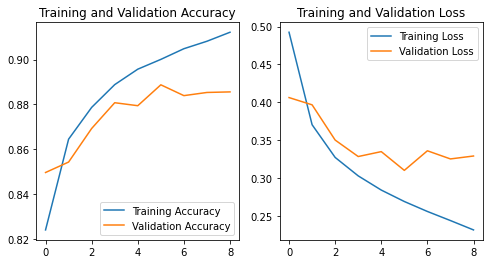

In [33]:
epochs = 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()


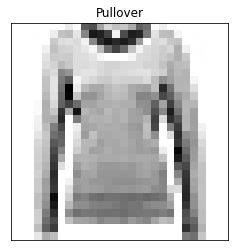

In [34]:
plt.imshow(test_images[110],cmap='gray_r')
plt.title(class_names[test_labels[110]])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [35]:
pred = model.predict(test_images[110].reshape(1,28,28))

In [36]:
pred.round()

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
np.argmax(pred)

2

In [39]:
class_names[np.argmax(pred)]

'Pullover'